In [26]:
# ============================================
# 1. Imports & Setup
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Load dataset
df = pd.read_csv("titanic.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [27]:
# ============================================
# 2. Basic Overview
# ============================================

df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Owen Harris Braund,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


In [28]:
# ============================================
# 3. Missing Value Analysis
# ============================================

missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
})

missing_df


,Missing Count,Missing %
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
Siblings/Spouses Aboard,0,0.0
Parents/Children Aboard,0,0.0
Fare,0,0.0


In [29]:
if "age" in df.columns:
    sns.histplot(df["age"], bins=30, kde=True)
    plt.title("Age Distribution")
    plt.show()
if {"sex","survived"}.issubset(df.columns):
    sns.countplot(data=df, x="sex", hue="survived")
    plt.title("Survival by Gender")
    plt.show()

if {"pclass","survived"}.issubset(df.columns):
    sns.countplot(data=df, x="pclass", hue="survived")
    plt.title("Survival by Passenger Class")
    plt.show()


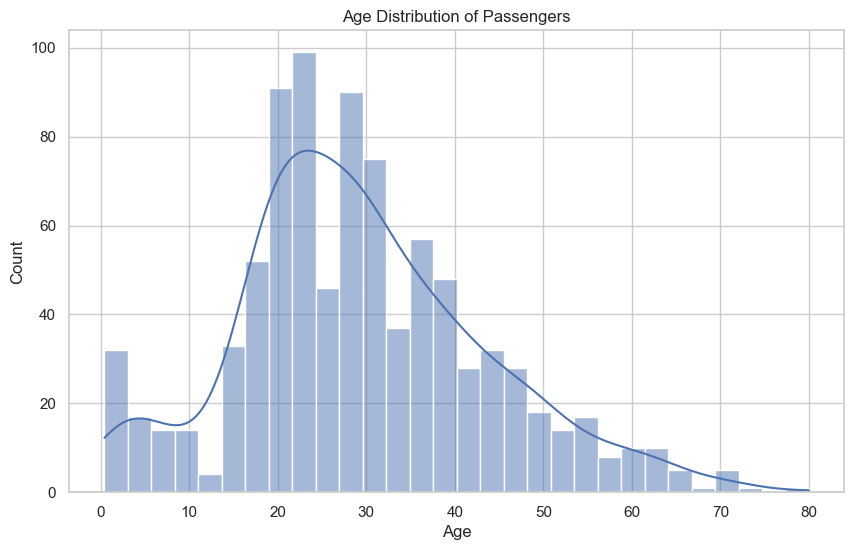

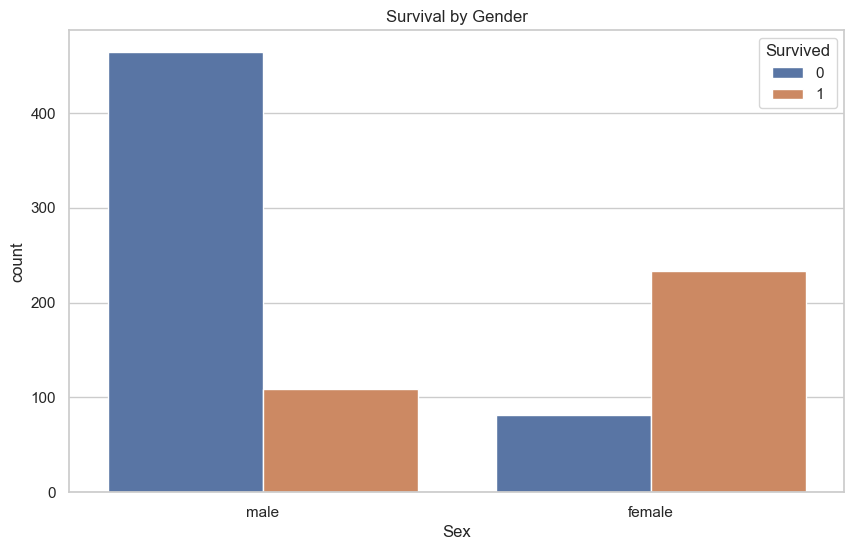

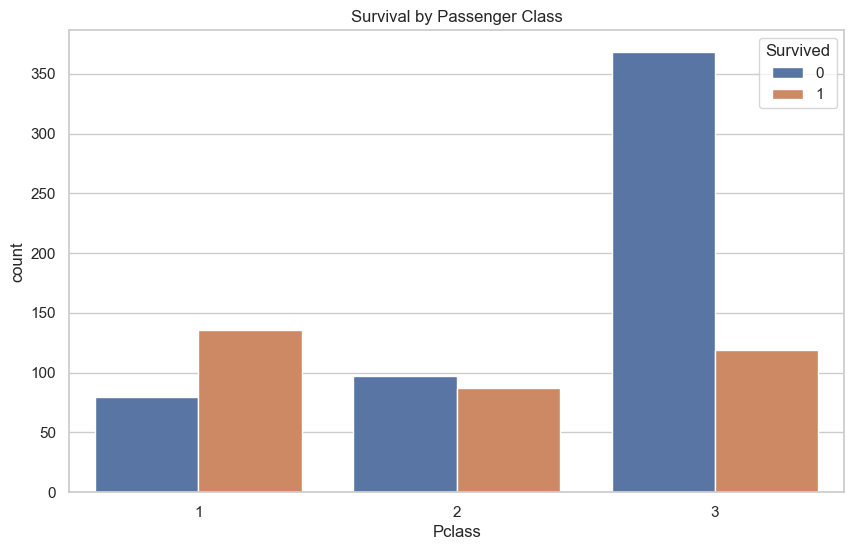

In [30]:
# ============================================
# 4. Passenger Demographics
# ============================================

# Age Distribution
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

# Sex distribution
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.show()

# Class distribution
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()



In [31]:
# ============================================
# 5. Missing Value Handling
# ============================================

# Age → impute with median
df["Age"].fillna(df["Age"].median(), inplace=True)


df.isnull().sum()


/var/folders/z1/rw2zf0w95kq0c2ys1wx9nrfr0000gn/T/ipykernel_28317/844611969.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [32]:
df = df.rename(columns={"Siblings/Spouses Aboard": "SibSp"})
df = df.rename(columns={"Parents/Children Aboard": "Parch"})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [33]:
# ============================================
# 6. Feature Engineering
# ============================================

# Family size feature
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Is alone feature
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1


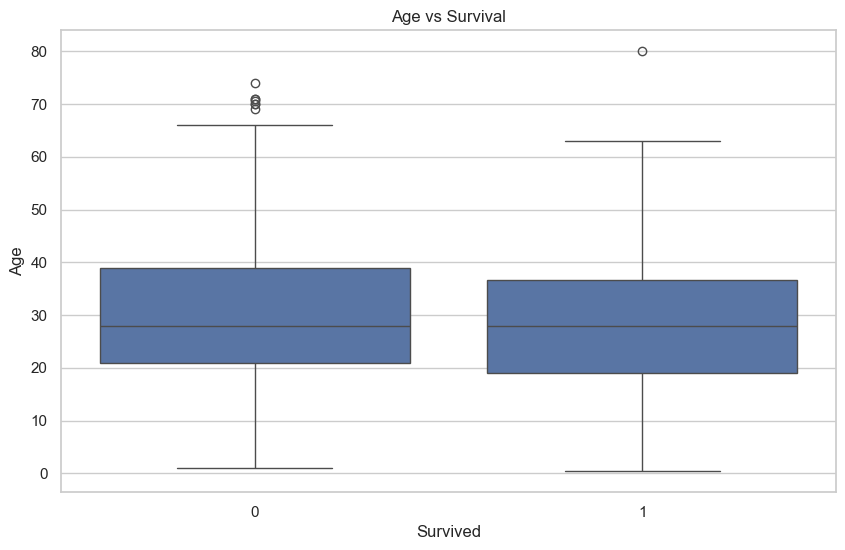

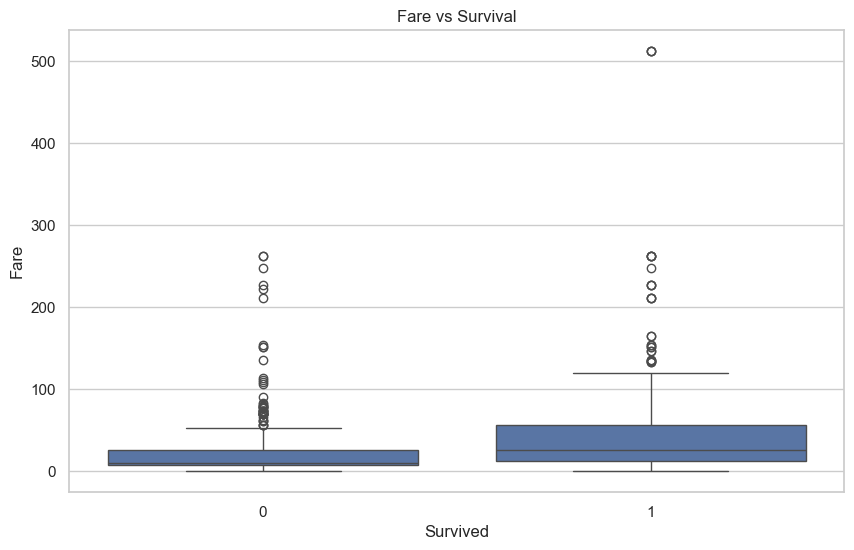

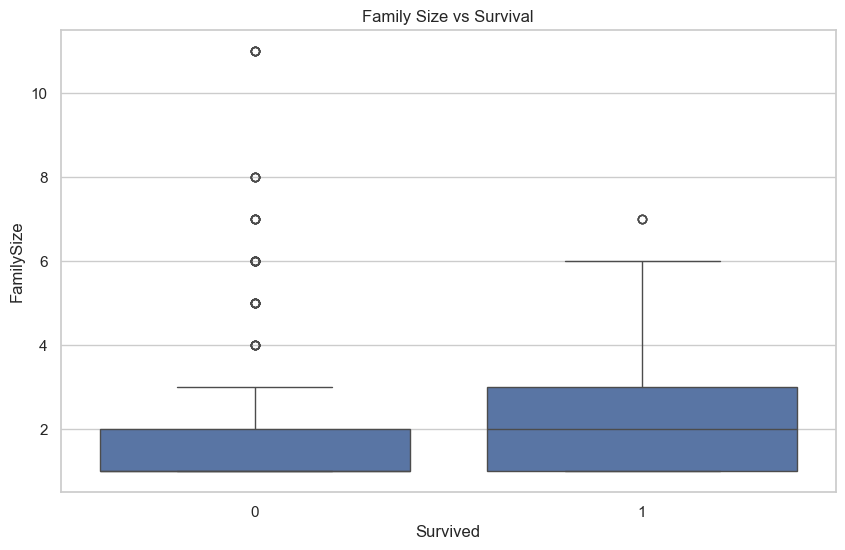

In [34]:
# ============================================
# 7. Survival Insights with Boxplots
# ============================================

sns.boxplot(data=df, x="Survived", y="Age")
plt.title("Age vs Survival")
plt.show()

sns.boxplot(data=df, x="Survived", y="Fare")
plt.title("Fare vs Survival")
plt.show()

sns.boxplot(data=df, x="Survived", y="FamilySize")
plt.title("Family Size vs Survival")
plt.show()


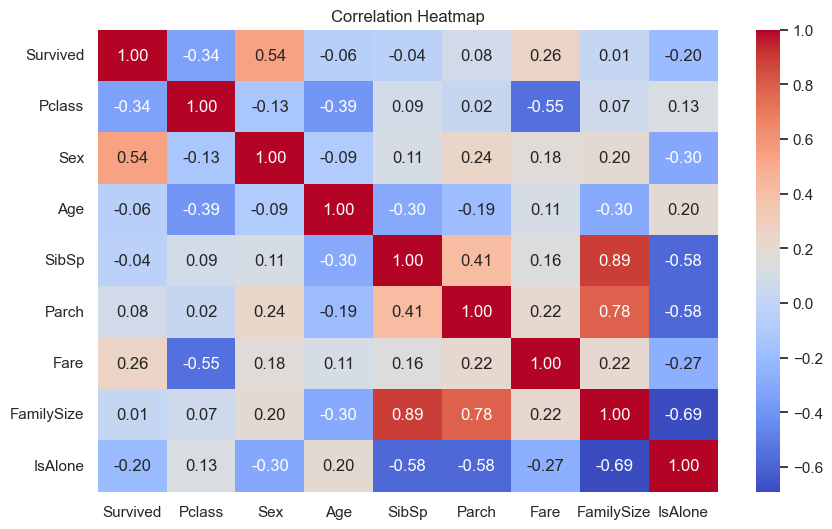

In [35]:
# ============================================
# 8. Correlation Analysis
# ============================================

# Convert categorical variables
df_encoded = df.copy()
df_encoded["Sex"] = df_encoded["Sex"].map({"male": 0, "female": 1})
#df_encoded["Embarked"] = df_encoded["Embarked"].map({"S": 0, "C": 1, "Q": 2})

corr = df_encoded.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [36]:
# ============================================
# 9. Survival Rate Summary Tables
# ============================================

print("Survival by Gender:")
print(df.groupby("Sex")["Survived"].mean())

print("\nSurvival by Class:")
print(df.groupby("Pclass")["Survived"].mean())


print("\nSurvival by Family Size:")
print(df.groupby("FamilySize")["Survived"].mean())


Survival by Gender:
Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

Survival by Class:
Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64

Survival by Family Size:
FamilySize
1     0.305816
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [38]:
# ============================================
# 10. Key Observations (Auto Summary)
# ============================================

print("""
Key EDA Findings:
1. Females show significantly higher survival rates.
2. First-class passengers survive more than third-class.
3. Younger passengers have slightly better survival.
4. Higher fare correlates with survival.
5. Medium family sizes perform better than being alone.
""")



Key EDA Findings:
1. Females show significantly higher survival rates.
2. First-class passengers survive more than third-class.
3. Younger passengers have slightly better survival.
4. Higher fare correlates with survival.
5. Medium family sizes perform better than being alone.

